In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as wb
from scipy import stats 
import statsmodels.api as sm

In [2]:
# data source obtained from Kaggle
## https://www.kaggle.com/beksultankarimov/warsaw-flat-rent-prices?select=data_clean.csv
### housing prices in Warsaw, Poland 
#### download file into the directory
data = pd.read_csv('data_clean.csv')

In [3]:
data.head()

,area,room_num,floor,total_floor,year_built,poddasze,dish_washer(zmywarka),fridge(lodówka),furniture(meble),oven(piekarnik),...,district_ Warszawa,district_ Wawer,district_ Wesoła,district_ Wilanów,district_ Wola,district_ Włochy,district_ mazowieckie,district_ Śródmieście,district_ Żoliborz,gross_price
0,37.0,2.0,1.0,4.000000,2001.453488,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2435.244186
1,38.0,2.0,1.0,5.802326,2020.000000,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2175.000000
2,57.0,3.0,1.0,15.000000,1984.000000,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3300.000000
3,63.0,2.0,4.0,5.000000,2005.000000,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2585.046512
4,65.0,3.0,3.0,4.000000,1938.000000,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3424.918605


In [4]:
# univariate regression
x_independent_variable = data['area']
y_dependent_variable = data['gross_price']

In [5]:
x1 = sm.add_constant(x_independent_variable)
reg = sm.OLS(y_dependent_variable, x1).fit()

In [6]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            gross_price   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     4975.
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:54:55   Log-Likelihood:                -27145.
No. Observations:                3472   AIC:                         5.429e+04
Df Residuals:                    3470   BIC:                         5.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        882.8393     28.288     31.209      0.000     827.377     938.302
area          40.9354      0.580     70.535      0.000      39.798      42.073
==============================================================================
Omnibus:                     1535.186   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25336.058
Skew:                           1.672   Prob(JB):                         0.00
Kurtosis:                      15.804   Cond. No.                         135.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

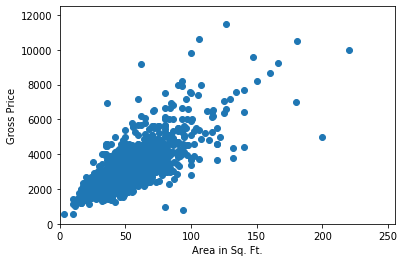

In [7]:
plt.scatter(x_independent_variable, y_dependent_variable)
plt.axis([0, 255, 0, 12500])
plt.xlabel('Area in Sq. Ft.')
plt.ylabel('Gross Price')
plt.show()

In [8]:
# expected value of Y
882.8393 + 40.9354 * 230

10297.9813

In [9]:
# the alpha, the beta and the R^2
slope, intercept, r_value, p_value, std_err = stats.linregress(x_independent_variable, y_dependent_variable)

In [10]:
slope

40.93536767036776

In [11]:
intercept

882.8392643205552

In [12]:
r_value 

0.7675403638649139

In [13]:
r_value ** 2

0.5891182101618844

In [14]:
p_value

0.0

In [15]:
std_err

0.5803515936042719